<h1 align="center"> Machine Learning | 2024</h1>
<br>
<p style="text-align: center;align:center;"><font size = 5>Linear Regression & Gradient Descent</font></p>
<div style="align:center;"> <img src="Images/Nourzad.jpg" width="100" height="100"/> </div>
<h3 align="center">
    <font color="darkBlue"> Abdulrahman Nourzad </font>
    <br>
    <font color="black">
        <em style="align:center; font-size:10pt; color:brown;">
            Master in Computer Software Engineer & Post DBA in Business Intelligence 
        </em>
    </font>
</h3>
<br>
<br>

### Project: predicting real estate prices with Machine Learning (Linear Regression Algorithm) using Python

Real Estate Price prediction plays a crucial role in both the real estate market and the economy at large. For investors, developers, and homeowners, accurate price predictions facilitate informed decision-making, investment planning, and risk management.

Real estate dataset contains 414 entries with detailed information on real estate transactions. It encompasses several features that are typically influential in real estate pricing:

Transaction date: Date of the property transaction.
House age: Age of the property in years.
Distance to the nearest MRT station: Proximity to the nearest Mass Rapid Transit station in meters, is a key factor considering convenience and accessibility.
Number of convenience stores: Count of convenience stores in the vicinity, indicating the property’s accessibility to basic amenities.
Latitude and Longitude: Geographical coordinates of the property, reflecting its location.
House price of unit area: The target variable, represents the house price per unit area.

The dataset is well-rounded, featuring a mix of continuous and categorical variables. It lacks missing values, making it a robust foundation for predictive modelling.

The primary objective is to develop a predictive model that accurately forecasts the house price per unit area based on various features like the property’s age, its proximity to key amenities (MRT stations and convenience stores), and its geographical location.

# Step 1: Import Libraries

In [1]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from summarytools import dfSummary

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Step 2: Read and get Information of dataset

In [3]:
# Load the dataset
real_estate_data = pd.read_csv('Dataset/Real Estate.csv')   # path of dataset

In [4]:
# Display the first five rows of the dataset
real_estate_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
# Display the shape of dataset
real_estate_data.shape

(414, 8)

#### Result: Count of Features: 8  , Count of Records: 414

In [6]:
# Display the info about the dataset
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


#### Result: The dataset contains 8 columns. Here’s a brief overview of the columns:
####      1. No: Number of Row
####      2. Transaction date: The date of the real estate transaction.
####      3. House age: Age of the house in years.
####      4. Distance to the nearest MRT station: Distance to the nearest Mass Rapid Transit station in meters.
####      5. Number of convenience stores: Number of convenience stores in the vicinity.
####      6. Latitude: Latitude of the property location.
####      7. Longitude: Longitude of the property location.
####      8. House price of unit area: House price of unit area.

In [7]:
# Descriptive statistics of the dataset
real_estate_data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Step 3: Preprocessing

### 3-1: Checking Missing Data

In [8]:
# Checking the data contains any null values or not:
real_estate_data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

#### Result: There are no null values in the dataset.

### 3-2: Remove unnecessary columns

In [9]:
real_estate_data.drop(['No' ,'X1 transaction date'], axis=1, inplace=True)
real_estate_data

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


### 3-3: Checking Duplicate Records

#### Summary of Dataset

In [10]:
dfSummary(real_estate_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,X2 house age[float64],Mean (sd) : 17.7 (11.4)min < med < max:0.0 < 16.1 < 43.8IQR (CV) : 19.1 (1.6),236 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrUlEQVR4nO3cQY7aMBiG4d9lQAGkRAgJdlygUhcsOUQP2yN0wQm4ATskhILITEQI6bqbDsRx8Zd5n30YS3k1chzHrmkaA2L37dUDAB7x9uoBhOKcG5vZyOMnrk3TfHQ1HvjpZajOufF8Pv+Zpums7W+cz+eTc+4Xscahl6Ga2ShN09lms/nIsqx89uI8z5Ptdjs7Ho8jMyPUCPQ1VDMzy7KsXCwW7y0vH3c6GHjhYQoSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSPv2u3/NoHI7FQSf+Garv0Tgci4OufPYftfXROByLgy49dKSPx9E4HIuDTvAwBQmECglRn+bnseKQ3u/3YdfjUdDXVZpoQ/VZcaiqKqnr+ntZlr/NrO2xk3L6vEoTbajmseKw3+9nu91ucrvdBqEGF6nertLEHKqZtVtxOJ1OX3q1oY+rNEFDret6aGapc67N5S+dZ3qOPdq5nqpgoRZFMayq6sdqtRoMBoOnz9F/5TzTd+wxz/VUBQv1er2+JUkyWa/X5XK5PD17/SvnmT5jj32upyr4HHU6nbaaL8Uwz2w7dot4rqeKBX9IIFRIIFRIIFRIIFRIIFRIIFRIiP5d/1fjuU2vt9sbCTUivtv0+ry9kVDj0nqbnpn/a2fPjThmATfjEGqE2m7T83nt7LsRxyzsZhxChZn5byIKvRmHUPEXj404ZgE347A8BQmECgmECgmECgmECgk89aMzIb/cJdQAPG6Y7Lv60F/uEmrHfG6Y8rv60F/uEmrHfG5YH44iCvXlLqEG0uaGxfCJeKx46ocEQoUEQoWEh+aoeZ4nz/7w5XJJzMyKokgOh8Pkf16v+rdVx+17/SN9/QFx/bzAQnP1VAAAAABJRU5ErkJggg=="">",0(0.0%)
2,X3 distance to the nearest MRT station[float64],Mean (sd) : 1083.9 (1262.1)min < med < max:23.4 < 492.2 < 6488.0IQR (CV) : 1165.0 (0.9),259 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC2UlEQVR4nO3ZvW/aQBiA8fcgoOOjvjggsrF0yFCpQ6QsLN065o/N2p0hW6SsnbJEUQjYwoFiGXfohyq1DfG51LzW85t5bQ/PwZ0xeZ4LcOgaVT8A8BpHuz5gjOmISNvz+ps8z1ees8BPL4ZqjOkMBoPLIAhCn4vHcTw3xlwRK8ra9Y3aDoIgnEwmK+fcusiFoyiy0+k0nM1mbREhVJSy86dfRMQ5tx6NRs8e1+94zAC/4TAFFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVDiq+gFeYozpiEjbc3yT5/nqXz4PqrPXULMsa4lIYIzxGbcnJycfnXM9n+E4jufGmCtirYe9hZokSStN0/fj8bjZbDbXRefTNLUi8u7i4uJ6OBzGRWajKLLT6TSczWZtESHUGthbqJvN5sha2z0/P1+fnp7Oi87f3d2Ft7e3XWttOhqNnj0eoeMxgwO19z1qr9db+4Q2n89LhVZy2yHCHvegHPRhylfZbYdIdXvckgdIkZousFqGWnbbUdUe1xjTGQwGl0EQhL7XqOshspah/uC77fiuij1uOwiCcDKZrJxzhX8J6nyIrHWoWjnntC2wveOfKajAN+pflHxrUMsDTZUI9Q/KvjVYLBZLY8wnESk6G2y321bR+/2q5AJriMi2xO3LzL+4uF8VahRFtuhdl8ulFRFJksQ+PDx0/+d82Xs/PT31rbXds7Mzc3x8/KXI7GKx6N/c3HwYj8fDopGnaWqzLHv3+Ph4XeyJv7m/v3/ju8CyLGslSfK23+9/bjQaadF7l53f9bbiK+97E1c989dgAAAAAElFTkSuQmCC"">",0(0.0%)
3,X4 number of convenience stores[int64],Mean (sd) : 4.1 (2.9)min < med < max:0.0 < 4.0 < 10.0IQR (CV) : 5.0 (1.4),11 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACpklEQVR4nO3cTW7aQByG8f+UgAyoRogKdr5ApS5YsukNethuu+uCXIAbsEFICIygQXx2lUWlJMCMJ/bbPL91/CHrMWTGjN3lcjGg6j6VfQLALR6u/YFzrmlmDc/97y+Xy5PntrK4ZsV7M1TnXLPX6/1I07Trs/P1er10zv38SBeeaxbHtU/URpqm3dFo9NTpdHb37DjP82Q8HncXi0XDzD7SReeaRXD1q9/MrNPp7Pr9/h+P/Tc9tvkvcM2KxWAKEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEm76hb+v0+lUN7PUOee7C++FboEL7IKOjeJFC3W73dYPh8O3LMtqtVrtrrVDz3wXuoUusAs5NuKIFup+v39IkqQ1HA53g8Fgee/2gQvdvBfYFXBsRBD1q9/MrN1u+y5yMwtc6BawwC742CgWgylIIFRIIFRIIFRIIFRIiD7qx33KfEhSZYRaIWU+JKk6Qq2Qkh+SBIv5XlhCraAyH5L4iv1eWEJFUaK+F5ZQUahY74Ul1FcEjL7T8/lcj3BKNwmcNajsjAGhviBk9H04HJLT6fR1t9v9NjPf/zO9hM4arFarjXPul5n5zDhEvUEJ9QUho+/pdNqdTCat4/FYi3V+rwk579ls9vnx8fF7lmVffCKPfYMS6ht8Rt/L5bL0nwf6nnfI1FjsG5RQ8Q/fqbHYNyjP+iGBUCGh0l/9qlNEKF5lQ1WdIkIclQ1VdYoIcVQ21GeqU0QoFoMpSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSLhpcV+e58m9O95sNomZ2Xa7Tebzees9t1c9tup5h25/S19/ASEHttYjAaXCAAAAAElFTkSuQmCC"">",0(

### Result:
#### Missing values: No
#### Duplicate values: No

# Step 4: Data Visualization

### Pairplot: 

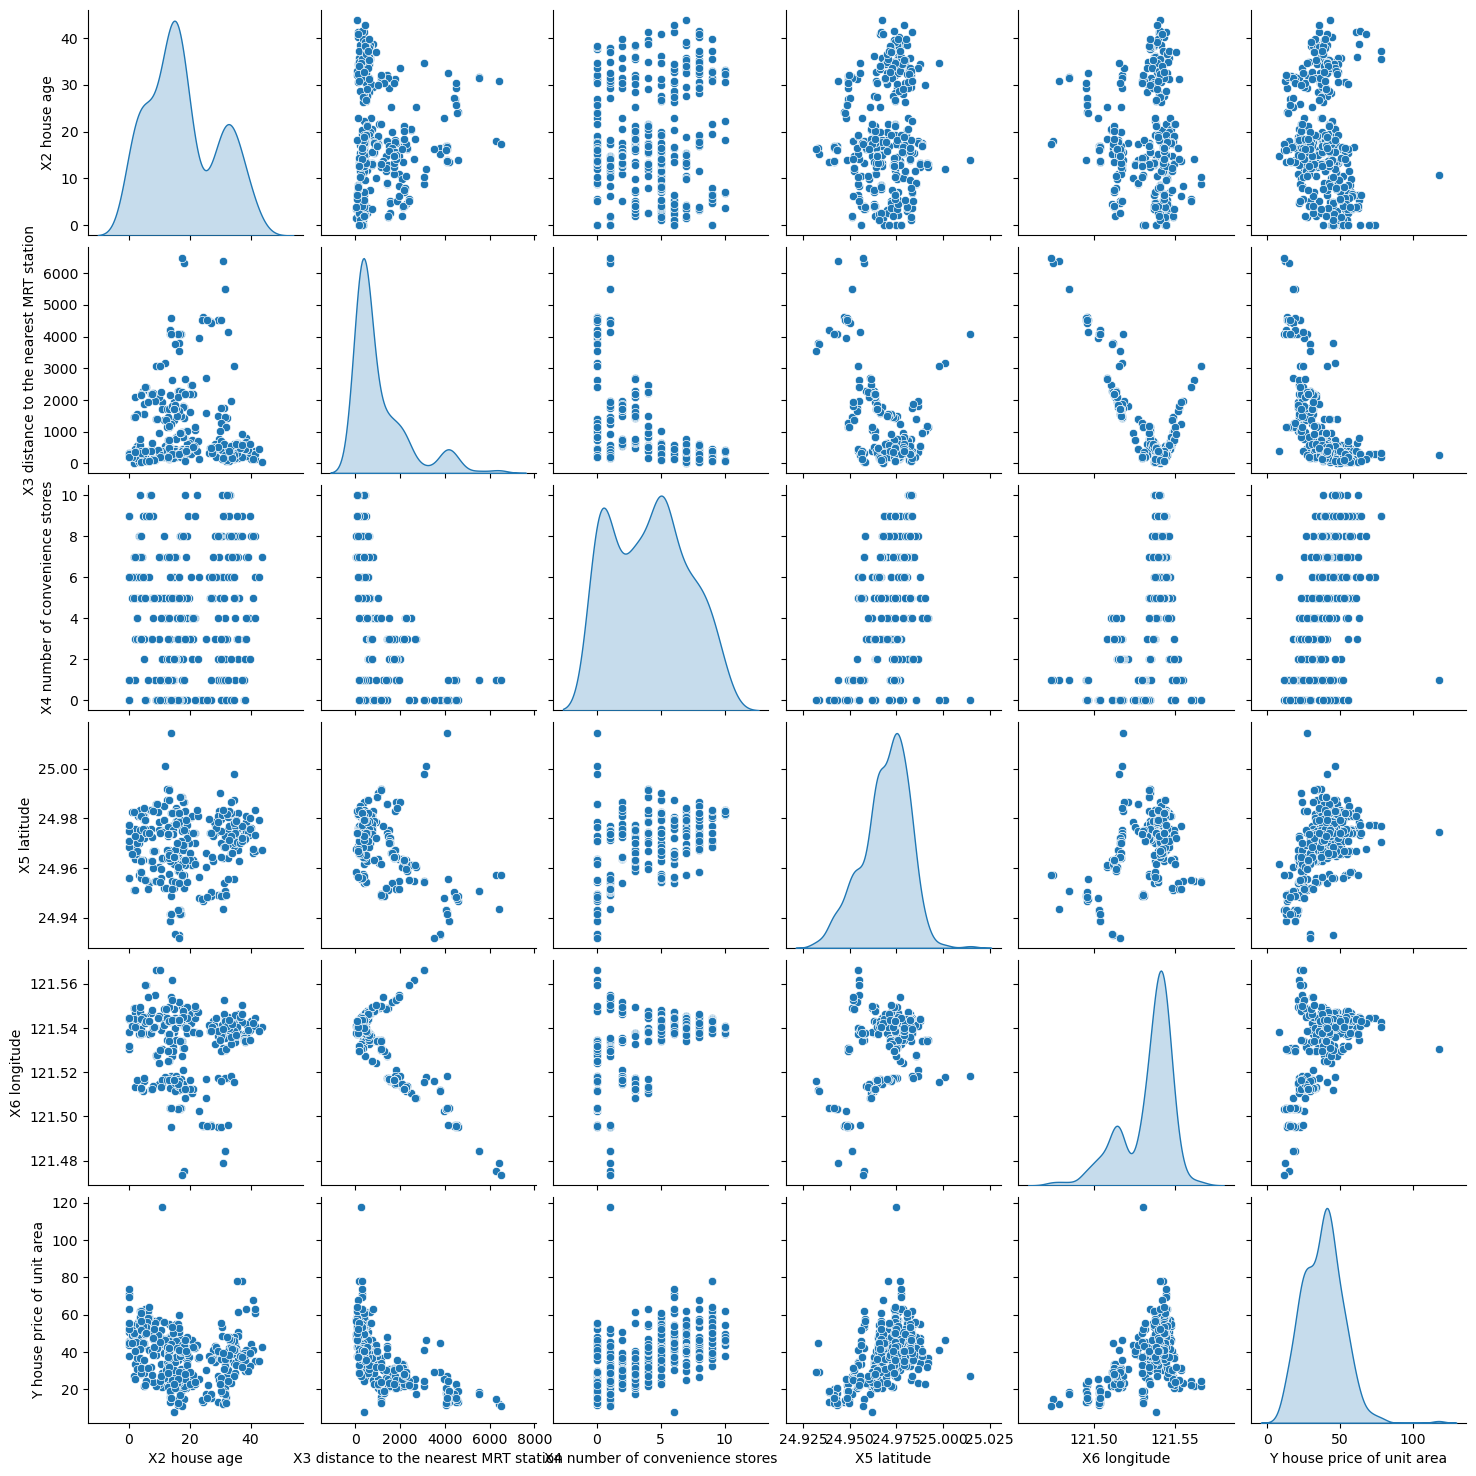

In [11]:
sns.pairplot(real_estate_data, diag_kind='kde')
plt.show()

### Displot: 

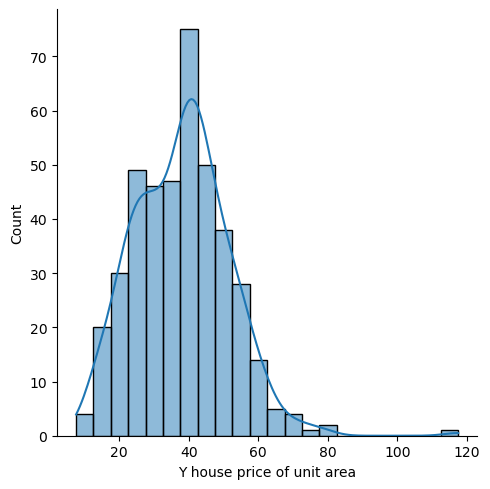

In [12]:
sns.displot(data=real_estate_data, x='Y house price of unit area', kde=True)
plt.show()

### Histograms:

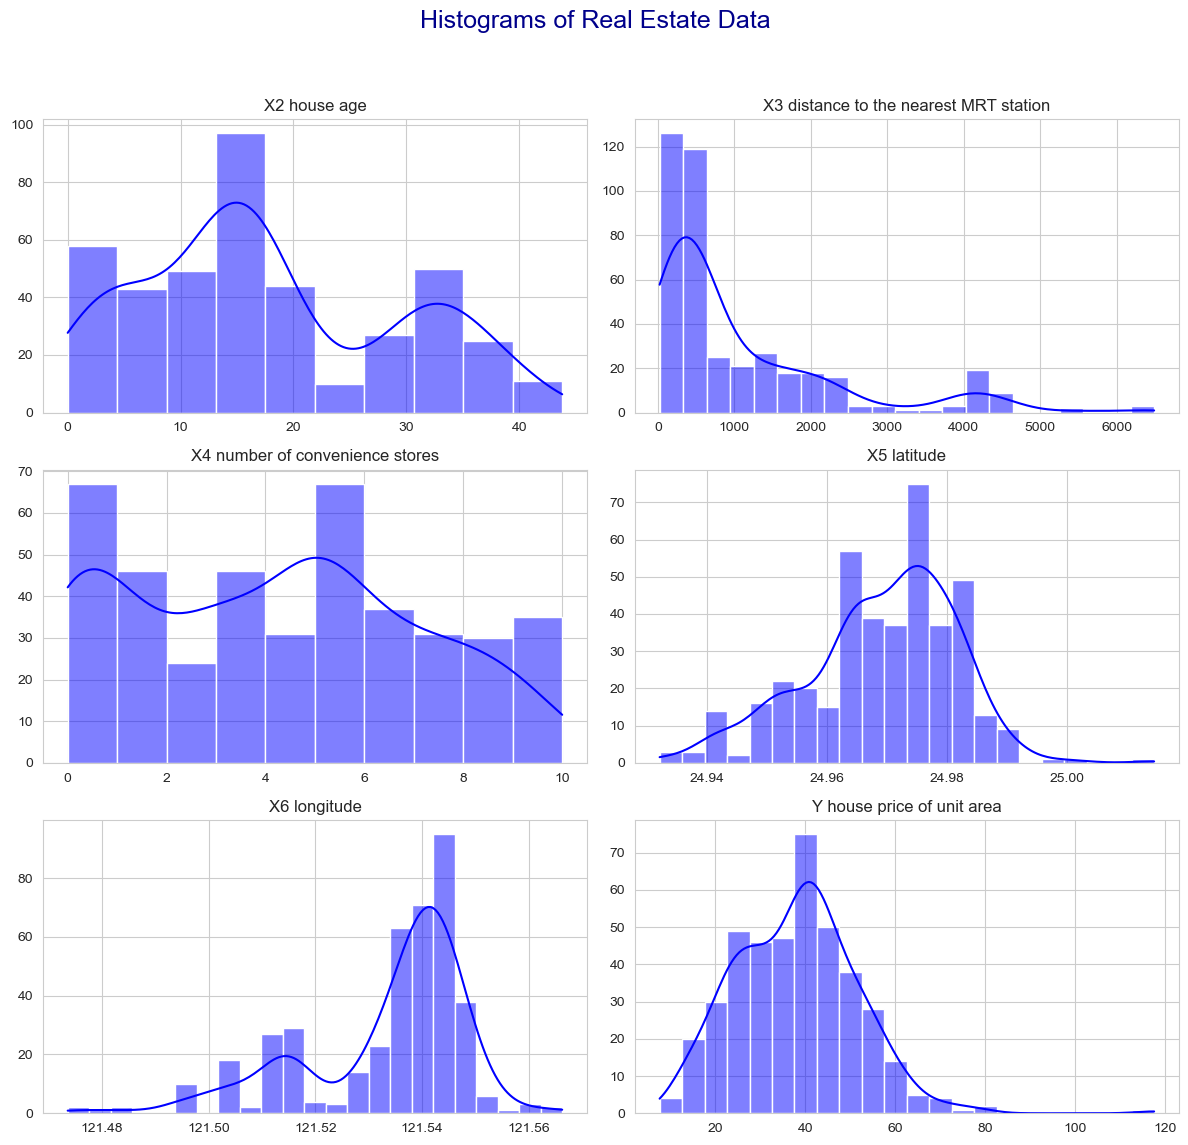

In [13]:
# the histograms of all the numerical features:

# Set the style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns (count of Numerical columns: 6)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of Real Estate Data', fontsize = 18 , color = 'darkblue')

cols = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores',
        'X5 latitude', 'X6 longitude', 'Y house price of unit area'] 

for i, col in enumerate(cols):
    sns.histplot(real_estate_data[col], kde=True, ax=axes[i//2, i%2], color='blue')
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Results: 
#### The histograms provide insights into the distribution of each variable:
#### 1. House Age: It seems that most of the houses are newly built and under 20 years old.
#### 2. Distance to the Nearest MRT Station: Most houses are located close to an MRT station, as indicated by the high frequency of lower distances. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.
#### 3. Number of Convenience Stores: Displays a wide range, with notable peaks at specific counts, like 0 and 5. It suggests certain common configurations in terms of convenience store availability.
#### 4. Latitude and Longitude: Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited area. Although in Langitude, it shows a right-skewed distribution.
#### 5. House Price of Unit Area: The histogram of house prices shows a normal distribution like a bell. Although there are few houses with high prices.

### Scatter Plots: 

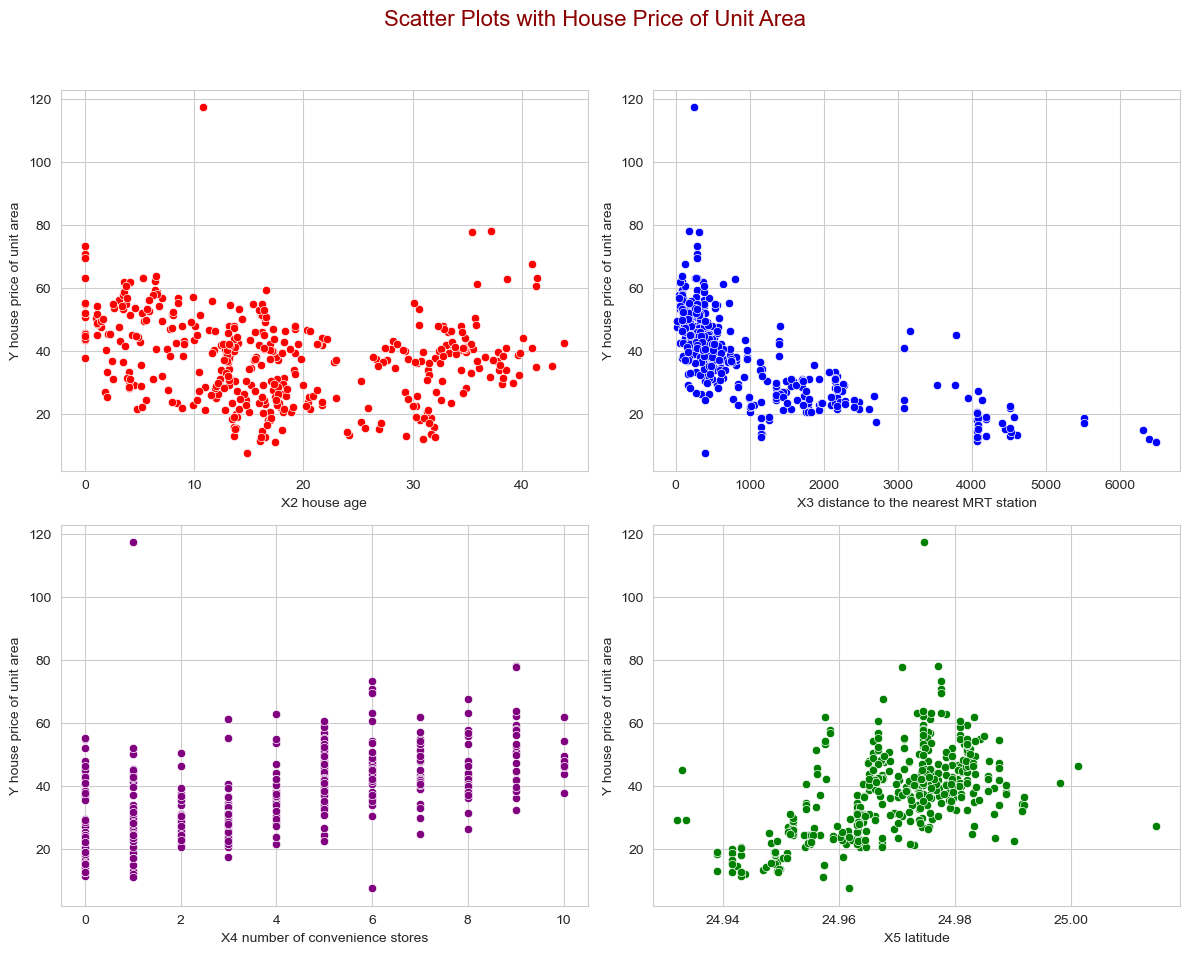

In [14]:
# Create scatter plots to explore the relationships between these variables and the house price.
# It will help us understand which factors might be influencing property prices more significantly:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16, color='darkred')

# Scatter plot for each variable against the house price
sns.scatterplot(data=real_estate_data, x='X2 house age', y='Y house price of unit area',
                ax=axes[0, 0], c='red')
sns.scatterplot(data=real_estate_data, x='X3 distance to the nearest MRT station', y='Y house price of unit area',
                ax=axes[0, 1], c='blue')
sns.scatterplot(data=real_estate_data, x='X4 number of convenience stores', y='Y house price of unit area',
                ax=axes[1, 0], c='purple')
sns.scatterplot(data=real_estate_data, x='X5 latitude', y='Y house price of unit area',
                ax=axes[1, 1], c='green')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Results:
#### The scatter plots revealed interesting relationships between various factors and house prices:
#### House Age vs. House Price: There doesn’t seem to be a strong linear relationship between house age and price. However, it appears that very new and very old houses might have higher prices.
#### Distance to the Nearest MRT Station vs. House Price: There is a clear trend showing that as the distance to the nearest MRT station increases, the house price tends to decrease. It suggests a strong negative relationship between these two variables.
#### Number of Convenience Stores vs. House Price: There seems to be a positive relationship between the number of convenience stores and house prices. Houses with more convenience stores in the vicinity tend to have higher prices.
#### Latitude vs. House Price: It seems that there is a good positive relationship between the two variables Latitude and House Price.


## Correlation Matrix:

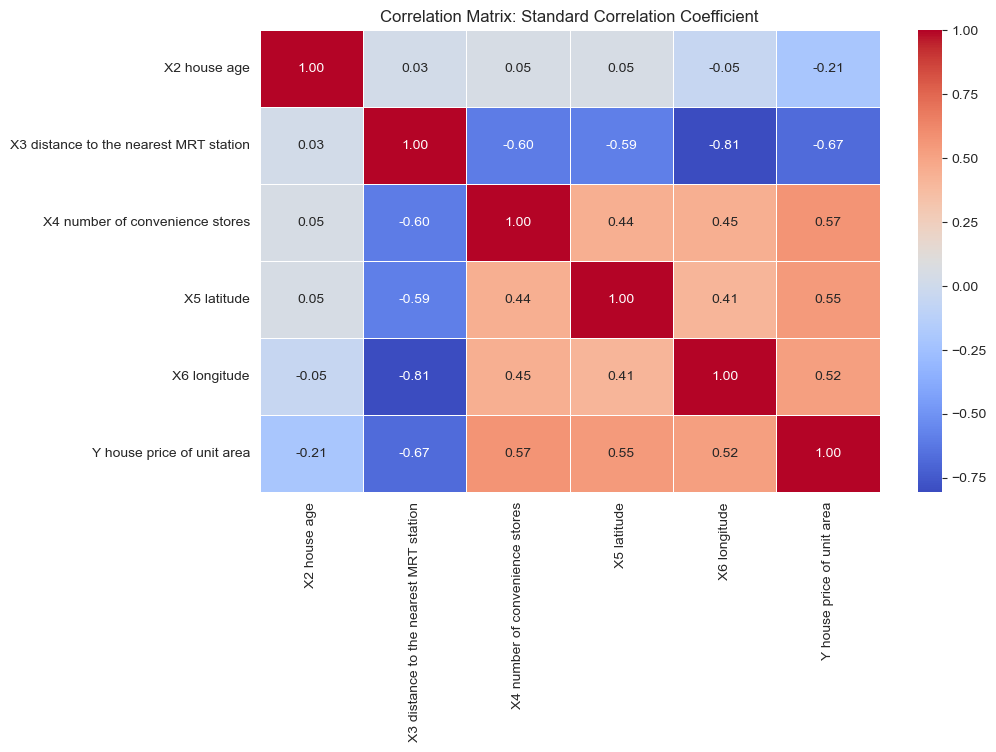

In [15]:
# it would be beneficial to perform a correlation analysis to quantify the relationships between these variables,
# especially how each one correlates with the house price:

# Correlation Matrix:>>>>>>>>> standard correlation coefficient
correlation_matrix = real_estate_data.corr(numeric_only=True)

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Standard Correlation Coefficient')
plt.show()

### Results:
#### The correlation matrix provides quantified insights into how each variable is related to the others, especially with respect to the house price:
#### 1. House Age: This shows a  weak negative correlation with house price (-0.21), implying that age is not a strong predictor of price in this dataset.
#### 2. Distance to Nearest MRT Station: Has a strong negative correlation with house price (-0.67). It indicates that properties closer to MRT stations tend to have higher prices, which is a significant factor in property valuation.
#### 3. Number of Convenience Stores: Displays a moderate positive upward correlation with house price (0.57). More convenience stores in the vicinity seem to positively affect property prices.
#### 4. Latitude and Longitude: Both show a moderate positive upward correlation with house prices. Latitude has a  positive correlation (0.55) and Longitude has a  positive correlation (0.52).

#### Overall, the most significant factors affecting house prices in this dataset appear to be the proximity to MRT stations and the number of convenience stores nearby and the geographical location (latitude and longitude). The age of the house seem to have less impact on the price.

## *** Features Selection (and Specify X, y):

In [16]:
# Selecting features and target variable

#cols = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores',
#       'X5 latitude', 'X6 longitude', 'Y house price of unit area'] 

features = ['X2 house age','X3 distance to the nearest MRT station',
           'X4 number of convenience stores','X5 latitude','X6 longitude']
target = 'Y house price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

In [17]:
X

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [18]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

# Step 5: Split Train set and Test set

### 5-1: Splitting the dataset into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### 5-2: Control shape of train and test X, y after splite

In [20]:
X_train.shape

(331, 5)

In [21]:
X_test.shape

(83, 5)

In [22]:
y_train.shape

(331,)

In [23]:
y_test.shape

(83,)

### 5-3: Scale data
The bigness or smallness of each feature is not the basis and criterion for the selection or role of that variable in modeling, and all variables will be important in terms of weight or coefficients created by the model. For this purpose, we use scaling.

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [26]:
X_train_s

array([[ 2.80728027e-01,  1.12273684e+00,  1.69839705e-02,
        -6.13056333e-01, -1.51530529e+00],
       [-4.90400412e-01, -7.23713594e-01,  1.42240753e+00,
         1.29557412e+00,  5.28728672e-01],
       [-2.59707841e-02,  2.42300046e+00, -1.38843959e+00,
        -2.06476980e+00, -1.98327274e+00],
       ...,
       [ 1.23587575e+00, -3.98866715e-01,  3.68339861e-01,
        -1.42884945e-03,  8.81033712e-01],
       [-9.54830041e-01, -8.14448617e-01,  1.77376342e+00,
         4.49075273e-01,  6.54361979e-01],
       [-1.15637497e+00,  8.87101300e-01, -3.34371920e-01,
        -4.39908841e-01, -1.38568362e+00]])

# Step 6: Create Model
### building a regression model to predict the real estate prices by using the Linear Regression algorithm:

In [27]:
# Model initialization
model = LinearRegression()

# Step 7: Training the model

In [28]:
# Training (Fitting) the model
model.fit(X_train_s, y_train)

LinearRegression()

#### Display w, b from F(w,b)=wX+b  or y=wX+b in while Training Model:

In [29]:
# Dsiplay w (slope): 
model.coef_

array([-3.2890978 , -5.09535219,  3.63417488,  3.13159813,  0.20792355])

In [30]:
# Display b (Intercept):
model.intercept_

37.99728096676719

# Step 8: Predicting Test Data

In [31]:
# Making predictions using the linear regression model
y_test_pred = model.predict(X_test_s)
y_test_pred

array([13.88834773,  8.05585741, 23.59638182, 48.50585193, 29.84808525,
       36.76880616, 37.97729473, 40.62401021, 46.37084548, 40.42370322,
       43.62852706, 32.73150563, 38.66507849, 36.97803145, 46.56343771,
       49.03627827, 37.94915731, 46.15145499, 50.50203316, 47.81990623,
       40.05203914, 53.21861635, 47.03374647, 37.27190667, 31.54825611,
       50.69613013, 38.98090995, 48.82789606, 45.85212288, 38.17341734,
       50.21687006, 42.18711732, 43.39373698, 45.73791117, 44.81669199,
        6.62737528, 37.53031107, 38.941654  ,  6.56973172, 55.33181466,
       30.36159277, 47.78991627, 23.40655032, 48.89008402, 42.89435237,
       50.97972551, 40.36785238, 36.75743135, 45.27917278, 35.99216128,
       47.05828063, 35.62946476, 42.01418662, 13.75284727, 38.61895938,
       47.55981441, 43.09021513, 46.01506471, 43.52465039, 40.15201096,
       32.64134274, 44.06046724, 42.10065197, 42.48204696, 52.61927289,
       42.72445488, 23.97169914, 48.554515  , 30.52426307, 39.21

# Step 9: Evaluating the Model

In [32]:
# Loss Function:

# Calculate MSE: 
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error:', (mse_test).round(3))

# Calculate RMSE:
rmse_test = np.sqrt(mse_test)
print('Root Mean Squared Error:', (rmse_test).round(3))

# Calculate MAE: 
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error:', (mae_test).round(3))

# Calculate R2:
r_square_test = r2_score(y_test, y_test_pred)
print('R-Square value:', (r_square_test).round(2))

Mean Squared Error: 47.099
Root Mean Squared Error: 6.863
Mean Absolute Error: 5.272
R-Square value: 0.59


In [33]:
average = np.mean(y_test)
print('Average of y_test: ', average.round(3))
Percentage_Error = ((rmse_test / average) * 100).round(3)
print('Percentage of Error: ', Percentage_Error, '%')

Average of y_test:  37.912
Percentage of Error:  18.102 %


### Visualization of Results: Actual vs. Predicted values

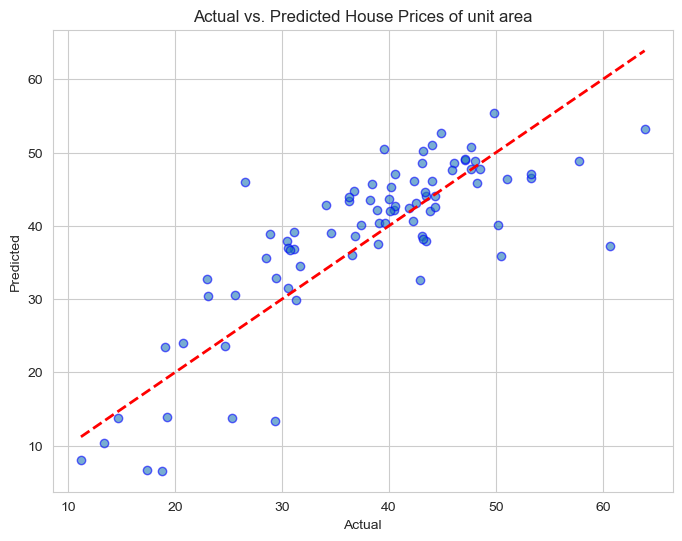

In [34]:
# Visualization: Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolors='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices of unit area')
plt.show()

### Result:
#### The diagonal dashed line represents where the actual and predicted values would be equal.
#### Points close to this line indicate accurate predictions.
#### From the plot, we can observe:
#### Many points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a 
#### significant portion of the test set.
#### Some points are further from the line, indicating areas where the model’s predictions deviate more significantly from the actual values.

# Step 10: Model optimization using gradient descent

SGDRegressor is a machine learning algorithm in Scikit-Learn that implements Stochastic Gradient Descent (SGD) to solve regression problems. It is a popular choice for large-scale regression tasks due to its ability to handle high-dimensional datasets and its fast training time.

SGDRegressor works by iteratively updating the model weights using a small random subset of the training data, rather than the entire dataset, which makes it computationally efficient for large datasets. It also includes several hyperparameters that can be tuned to optimize performance, including learning rate, penalty or regularization term, and number of iterations.

SGDRegressor is a linear model that uses a linear function to predict the target variable.

### 10-1: Create the model with Gradient Descent

In [35]:
# SGD stands for Stochastic Gradient Descent: the gradient of the loss is
# estimated each sample at a time and the model is updated along the way with
# a decreasing strength schedule (aka learning rate).

sgd_reg = SGDRegressor(max_iter=10000, eta0=0.001,random_state=101)


### 10-2: Training the model

In [36]:
sgd_reg.fit(X_train_s, y_train)

SGDRegressor(eta0=0.001, max_iter=10000, random_state=101)

### 10-3: Predicting Test Data

In [37]:
y_pred_sgd = sgd_reg.predict(X_test_s)

In [38]:
y_pred_sgd

array([14.00673545,  8.70633023, 25.99063579, 48.55979936, 30.87589509,
       36.76102453, 37.86696913, 40.44251166, 46.40587346, 40.20676485,
       43.75680083, 32.84367316, 37.90293027, 37.88429157, 46.56681437,
       49.06571194, 37.25438561, 45.55522806, 50.68509059, 48.10986255,
       39.06763774, 53.16179925, 47.0643463 , 36.93318904, 30.98721741,
       50.29987974, 38.58269034, 48.88472917, 45.8134533 , 38.06153763,
       50.41136565, 41.84335927, 43.41361141, 45.28548973, 45.12558919,
        7.03814223, 36.72114149, 38.37015259,  6.98088373, 55.40371111,
       30.69008448, 47.9037697 , 22.81295455, 48.27544338, 43.22306129,
       51.08069376, 40.20971219, 36.21807429, 45.28637573, 35.64980763,
       47.06063919, 35.7849179 , 41.67158375, 13.77430386, 38.36837343,
       47.87488193, 43.09223663, 46.19881685, 43.65320594, 40.55300201,
       31.83483648, 43.17317495, 41.75747151, 42.48676947, 52.68992485,
       42.59335114, 24.90746574, 48.55438327, 30.11612371, 38.61

### 10-4: Evaluating the model

In [39]:
# Loss Function:

# Calculate MSE: 
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
print('Mean Squared Error (SGDRegressor):', (mse_sgd).round(3))

# Calculate RMSE:
rmse_sgd = np.sqrt(mse_sgd)
print('Root Mean Squared Error (SGDRegressor):', (rmse_sgd).round(3))

# Calculate MAE: 
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
print('Mean Absolute Error (SGDRegressor):', (mae_sgd).round(3))

# Calculate R2:
r_square_sgd = r2_score(y_test, y_pred_sgd)
print('R-Square value (SGDRegressor):', (r_square_sgd).round(2))

average = np.mean(y_test)
print('Average of y_test:', average.round(3))
Percentage_Error = ((rmse_sgd / average) * 100).round(3)
print('Percentage of Error (SGDRegressor):', Percentage_Error, '%')

print('**************************************************')
# Calculate MSE: 
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error (Linear Regression):', (mse_test).round(3))

# Calculate RMSE:
rmse_test = np.sqrt(mse_test)
print('Root Mean Squared Error (Linear Regression):', (rmse_test).round(3))

# Calculate MAE: 
mae_test = mean_absolute_error(y_test, y_test_pred)
print('Mean Absolute Error (Linear Regression):', (mae_test).round(3))

# Calculate R2:
r_square_test = r2_score(y_test, y_test_pred)
print('R-Square value (Linear Regression):', (r_square_test).round(2))

average = np.mean(y_test)
print('Average of y_test:', average.round(3))
Percentage_Error = ((rmse_test / average) * 100).round(3)
print('Percentage of Error (Linear Regression):', Percentage_Error, '%')

Mean Squared Error (SGDRegressor): 47.715
Root Mean Squared Error (SGDRegressor): 6.908
Mean Absolute Error (SGDRegressor): 5.271
R-Square value (SGDRegressor): 0.58
Average of y_test: 37.912
Percentage of Error (SGDRegressor): 18.22 %
**************************************************
Mean Squared Error (Linear Regression): 47.099
Root Mean Squared Error (Linear Regression): 6.863
Mean Absolute Error (Linear Regression): 5.272
R-Square value (Linear Regression): 0.59
Average of y_test: 37.912
Percentage of Error (Linear Regression): 18.102 %


## Result:
R2 (R-Square value) is a value between 0 and 100%, where a value of 0% indicates that the model shows no relationship with the dependent and independent variables around its mean, and a value of 100% indicates that the model accounts for all the variability of the response data. Around the average explains it.
In the case of evaluating two models, with almost identical coefficients of determination, a model with a smaller standard error (residual) error value is selected.

# Step 11: Use the final model to predict new real estate prices

In [40]:
# for example:
x_new = [[2.80728027e-01,  1.12273684e+00,  1.69839705e-02,-6.13056333e-01, -1.51530529e+00]]

y_pred_NEW = model.predict(x_new)
print('New Price (predict with Linear Regression): ', ((y_pred_NEW).round(3)))

y_pred_sgd_NEW = sgd_reg.predict(x_new)
print('New Price (predict with SGDRegressor): ', ((y_pred_sgd_NEW).round(3)))

New Price (predict with Linear Regression):  [29.18]
New Price (predict with SGDRegressor):  [28.904]


### **** So, this is how we can predict real estate prices with Machine Learning using Python.***

## Summary:
Real Estate Price Prediction is the process of estimating or forecasting the future prices of real estate properties, such as houses, apartments, or commercial buildings. The goal is to provide accurate property rates to buyers, sellers, investors, and real estate professionals to make informed decisions about real estate transactions. I hope you liked this article on Real Estate Price Prediction with Machine Learning using Python.

<h3 align="center"><font color="green"> Finished! </font> </h3>